### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading data

In [4]:
mnist = pd.read_csv("data/mnist.csv").values
labels = mnist[:, 0]
digits = mnist[:, 1:]
train_labels = mnist[:5000, 0]
train_digits = mnist[:5000, 1:]
test_labels = mnist[5000:, 0]
test_digits = mnist[5000:, 1:]

### Showing random digit

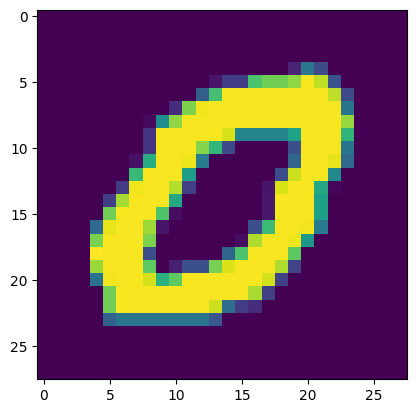

In [5]:
img_size = 28
# Show 100 digits of the data

plt.imshow(digits[np.random.randint(len(digits))].reshape(img_size, img_size))
plt.show()

### Summary of data

In [6]:
# Summarize the data


### Ink Feature

In [7]:
# create ink feature
import numpy as np
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean = np.array([np.mean(ink[labels == i]) for i in range(10)]).astype(int)
# compute standard deviation for each digit class
ink_std = np.array([np.std(ink[labels == i]) for i in range(10)]).astype(int)

print(ink_mean)
print(ink_std)

[34632 15188 29871 28320 24232 25835 27734 22931 30184 24553]
[8461 4409 7653 7574 6374 7526 7530 6168 7777 6465]


### Logit classifier

0.22680952380952382


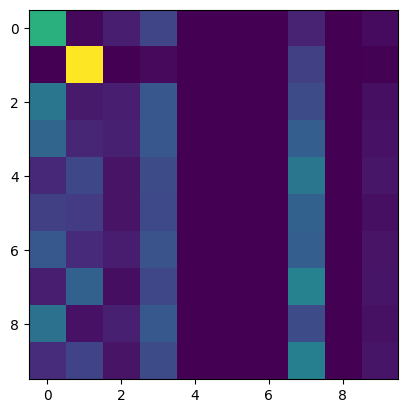

In [8]:
# fit logit model using ink feature
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
logit = LogisticRegression()
ink = scale(ink).reshape(-1, 1)
logit.fit(ink, labels)
print(logit.score(ink, labels))
results = logit.predict(ink)

confusion_matrix = np.zeros((10, 10))
for i in range(10):
    confusion_matrix[i] = np.bincount(results[labels == i], minlength=10)
confusion_matrix = confusion_matrix.astype(int)
plt.imshow(confusion_matrix)
plt.show()

### Logit with other feature

0.2687857142857143
Covariance between ink and new_feature:  0.29735579897581815
[[3783  218    0    0    0    0    0    0  131    0]
 [   8 4675    0    0    0    0    0    0    1    0]
 [1303 2797    0    0    0    0    0    0   77    0]
 [ 333 3990    0    0    0    0    0    0   28    0]
 [ 360 3686    0    0    0    0    0    0   26    0]
 [ 316 3465    0    0    0    0    0    0   14    0]
 [2861 1029    0    0    0    0    0    0  247    0]
 [  33 4368    0    0    0    0    0    0    0    0]
 [1063  169    0    0    0    0    0    0 2831    0]
 [3490  566    0    0    0    0    0    0  132    0]]


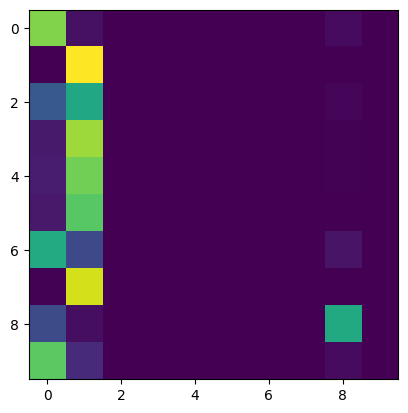

In [9]:
# apply sobel filter to the data
from scipy.ndimage import sobel
from sklearn.decomposition import PCA
import cv2

def compute_sobel_variance(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the gradient using Sobel operators
    gradient_magnitude = np.abs(sobel(image))

    # Compute the variance of the gradient magnitudes
    sobel_variance = np.var(gradient_magnitude)

    return sobel_variance

def compute_diagonal_symmetry(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the gradient using Sobel operators
    mirror_image = image.T

    # Compute the variance of the gradient magnitudes
    symmetry = np.dot(image.flatten(), mirror_image.flatten())

    return symmetry

def compute_texture_complexity(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    complexity = 0
    for i in range(28):
        for j in range(28):
            if i < 27:
                complexity += np.abs(image[i, j] - image[i + 1, j])
            if j < 27:
                complexity += np.abs(image[i, j] - image[i, j + 1])

    return complexity

def compute_symmetry(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the gradient using Sobel operators
    mirror_image = np.fliplr(image)

    # Compute the variance of the gradient magnitudes
    symmetry = np.dot(image.flatten(), mirror_image.flatten())

    return symmetry

def compute_vertical_symmetry(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the gradient using Sobel operators
    mirror_image = np.flipud(image)

    # Compute the variance of the gradient magnitudes
    symmetry = np.dot(image.flatten(), mirror_image.flatten())

    return symmetry


def calculate_aspect_ratio(image_array):
    # Find the bounding box of the digit
    non_zero_indices = np.nonzero(image_array.reshape(img_size, img_size))
    min_y, min_x = np.min(non_zero_indices, axis=1)
    max_y, max_x = np.max(non_zero_indices, axis=1)

    # Calculate width and height of the bounding box
    width = max_x - min_x
    height = max_y - min_y

    # Calculate aspect ratio
    aspect_ratio = width / height

    return aspect_ratio

def calculate_bounding_box_area(image_array):
    # Find the bounding box of the digit
    non_zero_indices = np.nonzero(image_array.reshape(img_size, img_size))
    min_y, min_x = np.min(non_zero_indices, axis=1)
    max_y, max_x = np.max(non_zero_indices, axis=1)

    # Calculate width and height of the bounding box
    width = max_x - min_x
    height = max_y - min_y

    # Calculate bounding box area
    bounding_box_area = width * height

    return bounding_box_area

def calculate_bounding_box_width(image_array):
    # Find the bounding box of the digit
    non_zero_indices = np.nonzero(image_array.reshape(img_size, img_size))
    min_y, min_x = np.min(non_zero_indices, axis=1)
    max_y, max_x = np.max(non_zero_indices, axis=1)

    # Calculate width and height of the bounding box
    width = max_x - min_x

    return width

def calculate_bounding_box_height(image_array):
    # Find the bounding box of the digit
    non_zero_indices = np.nonzero(image_array.reshape(img_size, img_size))
    min_y, min_x = np.min(non_zero_indices, axis=1)
    max_y, max_x = np.max(non_zero_indices, axis=1)

    # Calculate width and height of the bounding box
    height = max_y - min_y

    return height

def calculate_weighted_bounding_box_area(image_array):
    # Find the bounding box of the digit
    non_zero_indices = np.nonzero(image_array.reshape(img_size, img_size))
    min_y, min_x = np.min(non_zero_indices, axis=1)
    max_y, max_x = np.max(non_zero_indices, axis=1)

    # Calculate width and height of the bounding box
    width = max_x - min_x
    height = max_y - min_y

    # Calculate bounding box area
    bounding_box_area = width * height

    # Calculate weighted bounding box area
    weighted_bounding_box_area = bounding_box_area**2 / (width**3 + height)

    return weighted_bounding_box_area

def compute_normalized_central_mass_x(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the x and y coordinates of each pixel
    y, x = np.indices((28, 28))

    # Compute the total mass
    total_mass = image.sum()

    # Compute the center of mass
    center_of_mass_x = (x * image).sum() / total_mass

    # Normalize the center of mass
    normalized_center_of_mass_x = center_of_mass_x / 28

    return normalized_center_of_mass_x

def compute_normalized_central_mass_y(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the x and y coordinates of each pixel
    y, x = np.indices((28, 28))

    # Compute the total mass
    total_mass = image.sum()

    # Compute the center of mass
    center_of_mass_y = (y * image).sum() / total_mass

    # Normalize the center of mass
    normalized_center_of_mass_y = center_of_mass_y / 28

    return normalized_center_of_mass_y

def compute_normalized_central_mass(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the x and y coordinates of each pixel
    y, x = np.indices((28, 28))

    # Compute the total mass
    total_mass = image.sum()

    # Compute the center of mass
    center_of_mass_x = (x * image).sum() / total_mass
    center_of_mass_y = (y * image).sum() / total_mass

    # Normalize the center of mass
    normalized_center_of_mass_x = center_of_mass_x / 28
    normalized_center_of_mass_y = center_of_mass_y / 28

    return normalized_center_of_mass_x * normalized_center_of_mass_y

from scipy import ndimage

def compute_normalized_white_regions(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Binarize the image
    binary_image = (image > 0).astype(int)

    # Label connected white regions
    labeled_image, num_labels = ndimage.label(binary_image)

    # Compute the normalized count of white regions
    normalized_count = (num_labels - 1) / (28 * 28)

    return normalized_count

def compute_orientation(image):
    # Reshape the image to 2D
    image = image.reshape((28, 28))

    # Compute the x and y coordinates of each pixel
    y, x = np.indices((28, 28))
    
    # Compute the total mass
    total_mass = image.sum()
    
    # Compute the center of mass
    
    center_of_mass_x = (x * image).sum() / total_mass
    center_of_mass_y = (y * image).sum() / total_mass
    
    # Compute the moments of inertia
    Ixx = (x - center_of_mass_x)**2 * image
    Iyy = (y - center_of_mass_y)**2 * image
    Ixy = (x - center_of_mass_x) * (y - center_of_mass_y) * image

    # Compute the orientation
    orientation = np.arctan(2 * Ixy / (Iyy - Ixx + 1e-8)) / 2

    # Create single value
    orientation = (orientation @ orientation.T).sum() / total_mass
    
    orientation = orientation / np.pi
    
    return orientation

# Pretty good, acc: 0.3, combined: 0.376
def compute_number_of_corners(image):
    image = image.reshape((28, 28))
    # Make image compatible with OpenCV
    image = image.astype(np.uint8)
    
    corners = cv2.cornerHarris(image, 2, 3, 0.04)
    num_corners = np.sum(corners > 0.01 * corners.max())
    return num_corners

from skimage.measure import label, regionprops
 
# Best until now, acc: 0.267, combined: 0.391
def compute_number_of_holes(image):
    image = image.reshape((28, 28))
    image = image > 0
    image = ~image
    labeled = label(image)
    num_holes = labeled.max() - 1
    return num_holes

from skimage.morphology import convex_hull_image
def compute_convexity(image):
    image = image.reshape((28, 28))
    image = image > 0
    hull = convex_hull_image(image)
    perimeter = np.sum(image[:, :-1] != image[:, 1:]) + np.sum(image[:-1, :] != image[1:, :])
    hull_perimeter = np.sum(hull[:, :-1] != hull[:, 1:]) + np.sum(hull[:-1, :] != hull[1:, :])
    convexity = perimeter / hull_perimeter
    return convexity

def compute_eccentricity(image):
    image = image.reshape((28, 28))
    image = image > 0
    labeled = label(image)
    props = regionprops(labeled)
    eccentricity = props[0].eccentricity
    return eccentricity

logit_2 = LogisticRegression()
new_feature = np.array([compute_number_of_holes(row) for row in digits])
new_feature = scale(new_feature).reshape(-1, 1)
logit_2.fit(new_feature, labels)
print(logit_2.score(new_feature, labels))
print('Covariance between ink and new_feature: ', np.cov(ink.flatten(), new_feature.flatten())[0, 1])
results = logit_2.predict(new_feature)

confusion_matrix = np.zeros((10, 10))
for i in range(10):
    confusion_matrix[i] = np.bincount(results[labels == i], minlength=10)
confusion_matrix = confusion_matrix.astype(int)
print(confusion_matrix)
plt.imshow(confusion_matrix)
plt.show()

0.39052380952380955


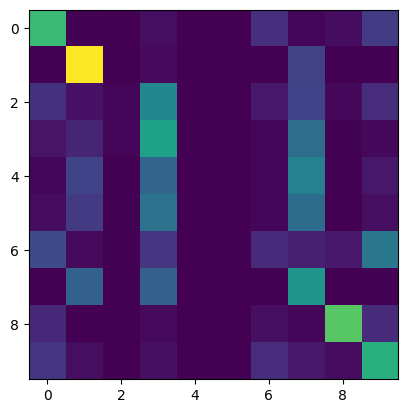

In [10]:
# Combine the two features
from sklearn.preprocessing import scale
logit_3 = LogisticRegression()
new_feature = np.concatenate((ink, new_feature), axis=1)
logit_3.fit(new_feature, labels)
print(logit_3.score(new_feature, labels))
results = logit_3.predict(new_feature)

confusion_matrix = np.zeros((10, 10))
for i in range(10):
    confusion_matrix[i] = np.bincount(results[labels == i], minlength=10)
confusion_matrix = confusion_matrix.astype(int)
plt.imshow(confusion_matrix)
plt.show()

### Train test split

In [11]:
# Combine labels and digits, so we can split randomly but keep the correct labels
combined_data = np.concatenate((labels.reshape(-1, 1), digits), axis=1)
np.random.shuffle(combined_data)
labels = combined_data[:, 0]
digits = combined_data[:, 1:]

# Split the data into training and test set
train_labels = labels[:5000]
train_digits = digits[:5000]
test_labels = labels[5000:]
test_digits = digits[5000:]

### Regularized multinomial logit

done fitting param:  0.0001  score:  0.8135135135135135


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.0002782559402207126  score:  0.863


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.000774263682681127  score:  0.8873783783783784


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.002154434690031882  score:  0.8965675675675676


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.0001  score:  0.8135135135135135


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.0002782559402207126  score:  0.8630540540540541


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.000774263682681127  score:  0.8874594594594595


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.002154434690031882  score:  0.8965405405405406


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.005994842503189409  score:  0.8948918918918919


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.12915496650148828  score:  0.8824594594594595


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.046415888336127774  score:  0.8834864864864865


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.016681005372000592  score:  0.8874594594594595


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  1.0  score:  0.882054054054054


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done fitting param:  0.3593813663804626  score:  0.8823243243243243


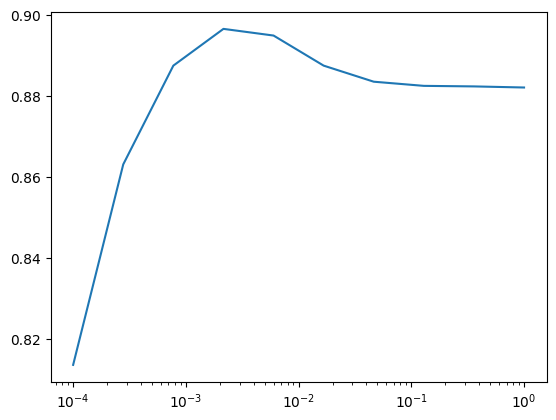

In [16]:
# Fit multinomial logit with LASSO regularization
from multiprocessing.pool import ThreadPool
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
import multiprocessing as mp

# Params from 0.0001 to 1
params = np.logspace(-4, 0, 10)
scores = []

# Perform grid search
with ThreadPool() as pool:
    def fit_logit(param):
        logit = LogisticRegression(C=param, penalty='l1', solver='saga', multi_class='multinomial', max_iter=300)
        logit.fit(train_digits, train_labels)
        score = logit.score(test_digits, test_labels)
        print("done fitting param: ", param, " score: ", score)
        return score
    
    scores = pool.map(fit_logit, params)
    

plt.plot(params, scores)
plt.xscale('log')
plt.show()

### SVM

{'C': 1.0, 'degree': 2, 'kernel': 'poly'}
0.9228000000000002
0.9325405405405406


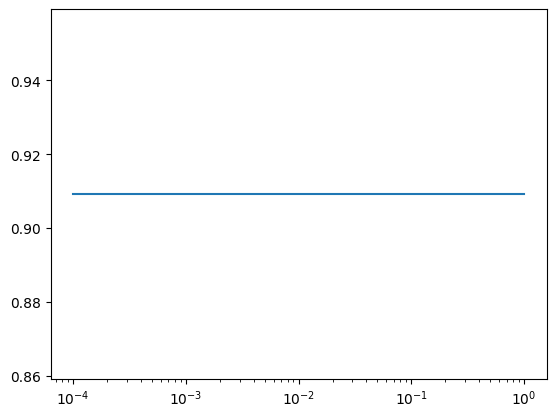

In [18]:
# Support vector machine
from sklearn.svm import SVC

# Best params: {'C': 1.0, 'degree': 2, 'kernel': 'poly'}
param_space = {
    'C': np.logspace(-4, 0, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}

# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

# Fit the model
clf = GridSearchCV(SVC(), param_space, cv=5, n_jobs=-1, verbose=2)
clf.fit(scale(train_digits), train_labels)
print(clf.best_params_)
print(clf.best_score_)
print(accuracy_score(clf.predict(scale(test_digits)), test_labels))